In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import auc

In [6]:
from sklearn.metrics import RocCurveDisplay

# 1. Make Classification Dataset

In [7]:
N = 1_000

In [8]:
data = pd.DataFrame(
    data={
        "y": np.random.binomial(n=1, p=0.5, size=N),
        "x1": np.random.randn(N),
        "x2": np.random.randn(N),
        "x3": np.random.randn(N),
    },
)

In [9]:
data.head()

,y,x1,x2,x3
0,1,-0.584186,-0.317310,-0.152532
1,1,-0.725454,-1.914098,-0.621262
2,0,1.152194,0.028451,-1.939052
3,1,0.101846,0.110991,1.302700
4,0,0.610969,1.530862,0.001169


In [10]:
X, y = data.loc[:, data.columns != "y"], data.loc[:, ["y"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

# 2. Fit a Single Classifier

In [12]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=7)

In [20]:
y_test_hat = tree.predict_proba(X=X_test)
y_test_hat = y_test_hat[:, 1]

In [14]:
fpr, tpr, _ = roc_curve(y_test["y"].values, y_test_hat)

In [15]:
roc_auc = auc(fpr, tpr)

In [16]:
print(f"Decision tree's AUC is {roc_auc:.5f}")

Decision tree's AUC is 0.48337


# 3. Draw the ROC Curve Manually

In [17]:
fig_roc = plt.figure()
ax_roc = fig_roc.add_subplot(1, 1, 1)
plt.close()

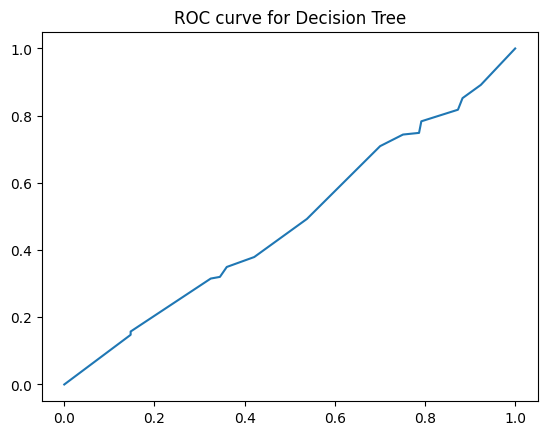

In [18]:
ax_roc.plot(fpr, tpr)
ax_roc.set_title("ROC curve for Decision Tree")
fig_roc

# 4. Draw the ROC Curve Using `RocCurveDisplay`

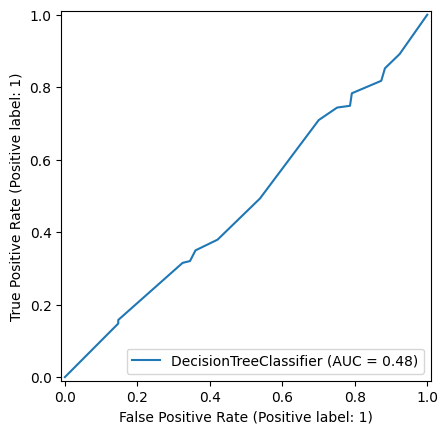

In [19]:
RocCurveDisplay.from_estimator(tree, X_test, y_test)